### Analyze the Spread of Novel CoronaVirus 
#### Data Source: [Johns Hopkins University](https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?sle=true)

#### How to [access](https://towardsdatascience.com/accessing-google-spreadsheet-data-using-python-90a5bc214fd2) 

In [1]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)

#### Load all sheets in the underlying file

In [3]:
##sheet = client.open('Learning Log').sheet1
sheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1wQVypefm946ch4XDp37uZ-wartW4V7ILdg-qYiDXUHM/htmlview?sle=true')
worksheet_list = sheet.worksheets()

len(worksheet_list)

raw_data = []
for worksheet in worksheet_list:
    sub_data = worksheet.get_all_records()
    raw_data = raw_data + sub_data

raw_df = pd.DataFrame(raw_data)
raw_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,,"Quick note: Starting from this tab, our map is updating (almost) in real time (China data - at least once per hour; non China data - several times per day). This table is planning to be updated twice a day. The discrepancy between the map and this sheet is expected. Sorry for any confusion and inconvenience.",Suspected,Demised,Country,Date last updated
0,Hubei,Mainland China,2/4/20 23:43,16678,479,522,NaN,NaN,NaN,NaN,NaN,NaN
1,Zhejiang,Mainland China,2/5/20 1:33,895,0,63,NaN,NaN,NaN,NaN,NaN,NaN
2,Guangdong,Mainland China,2/5/20 2:03,870,0,32,NaN,NaN,NaN,NaN,NaN,NaN
3,Henan,Mainland China,2/5/20 1:13,764,2,41,NaN,NaN,NaN,NaN,NaN,NaN
4,Hunan,Mainland China,2/5/20 1:43,661,0,35,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Merge duplicate columns with different names

main_df = raw_df

main_df.loc[main_df.Deaths.isna(),'Deaths'] =  main_df.loc[main_df.Deaths.isna(),'Demised']

main_df.loc[main_df['Country/Region'].isna(),'Country/Region'] =  main_df.loc[main_df['Country/Region'].isna(),'Country']
#main_df.loc[main_df['Country/Region'].isna(),'Country/Region'] =  main_df.loc[main_df['Country/Region'].isna(),'Country_Region']

#main_df.loc[main_df['Province/State'].isna(),'Province/State'] =  main_df.loc[main_df['Province/State'].isna(),'Province_State']

main_df.loc[main_df['Last Update'].isna(),'Last Update'] = main_df.loc[main_df['Last Update'].isna(),'Date last updated']
#main_df.loc[main_df['Last Update (UTC)'].isna(),'Last Update (UTC)'] = main_df.loc[main_df['Last Update (UTC)'].isna(),'Last_Update']
#main_df.loc[main_df['Last Update'].isna(),'Last Update'] = main_df.loc[main_df['Last Update'].isna(),'Last Update (UTC)']

main_df.loc[main_df['Province/State'].isna(), 'Province/State'] = main_df.loc[main_df['Province/State'].isna(), 'Country/Region']
main_df.loc[main_df['Province/State']=='', 'Province/State'] = main_df.loc[main_df['Province/State']=='', 'Country/Region']

main_df = main_df.loc[:, ~main_df.columns.isin(['Demised' , 'Country' , 'Country_Region','Province_State',
                                                'Date last updated', 'Last Update (UTC)', 'Last_Update','',
                                               'Quick note: Starting from this tab, our map is updating (almost) in real time (China data - at least once per hour; non China data - several times per day). This table is planning to be updated twice a day. The discrepancy between the map and this sheet is expected. Sorry for any confusion and inconvenience.'])]
main_df.sample(5)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Suspected
1397,Vietnam,Vietnam,1/27/2020 19:00,2,,,NaN
1144,New South Wales,Australia,1/29/2020 13:30,4,,,NaN
1833,Taiwan,China,1/22/2020 12:00,1,NaN,NaN,
722,Singapore,Singapore,2/1/2020 10:00,18,,,NaN
104,Qinghai,Mainland China,2/4/20 1:33,15,0,0,NaN


In [5]:
# merge duplicate country names
main_df['Country/Region'] = main_df['Country/Region'].str.replace(r'^China','Mainland China')
main_df['Country/Region'] = main_df['Country/Region'].str.replace(r'United States','US')

main_df['Last Update'] = pd.to_datetime(main_df['Last Update'])
main_df['day'] = main_df['Last Update'].dt.day
main_df['month'] = main_df['Last Update'].dt.month

main_df = main_df.fillna(0) # will take max value in the next step
main_df.Deaths.replace('',0, inplace=True)
main_df.Confirmed.replace('',0, inplace=True)
main_df.Suspected.replace('',0, inplace=True)
main_df.Recovered.replace('',0, inplace=True)

main_df.sample(5)

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Suspected,day,month
605,Spain,Spain,2020-02-01 23:43:00,1,0,0,0,1,2
1072,Jilin,Mainland China,2020-01-29 14:30:00,9,0,0,0,29,1
1428,Hebei,Mainland China,2020-01-27 09:00:00,18,1,0,0,27,1
578,Singapore,Singapore,2020-02-02 01:03:00,18,0,0,0,2,2
492,Beijing,Mainland China,2020-02-02 05:53:00,191,1,9,0,2,2


In [42]:
clean_df =main_df.groupby(['Province/State','month','day']).agg({'Last Update':'max',
                                                                  'Confirmed':'max',
                                                                  'Suspected':'max',
                                                                  'Recovered':'max',
                                                                  'Deaths':'max'}).reset_index()

clean_df['period'] = pd.to_datetime('2020-' + clean_df.month.astype(str) + '-' + clean_df.day.astype(str))

clean_df.sample(5)

,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period
8,Anhui,1,29,2020-01-29 21:00:00,200,0,2,0,2020-01-29
169,Guizhou,1,24,2020-01-24 12:00:00,3,0,0,0,2020-01-24
645,Tianjin,1,30,2020-01-30 21:30:00,32,0,0,0,2020-01-30
529,Shanghai,1,25,2020-01-25 12:00:00,40,72,1,1,2020-01-25
542,Shanxi,1,23,2020-01-23 12:00:00,1,0,0,0,2020-01-23


#### Some baisc checks

2020-01-21 00:00:00    27
2020-01-22 12:00:00    38
2020-01-23 12:00:00    46
2020-01-24 12:00:00    40
2020-01-24 16:00:00     1
                       ..
2020-02-05 01:53:00     1
2020-02-05 02:03:00     2
2020-02-05 02:33:00     1
2020-02-05 02:43:00     2
2020-02-05 02:53:00     2
Name: Last Update, Length: 132, dtype: int64

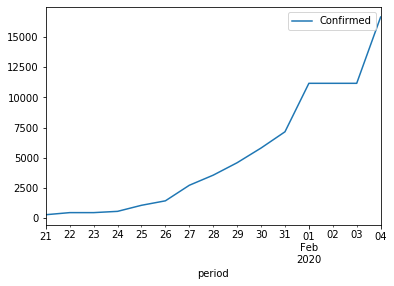

In [40]:
clean_df[clean_df['Province/State'] =='Hubei'].plot.line(x='period', y='Confirmed')

clean_df['Last Update'].value_counts().sort_index()

In [8]:
clean_df[clean_df['Confirmed'] >= 8].head()

,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period
2,Anhui,1,23,2020-01-23 12:00:00,9,4,0,0,2020-01-23
3,Anhui,1,24,2020-01-24 12:00:00,15,4,0,0,2020-01-24
4,Anhui,1,25,2020-01-25 12:00:00,60,4,0,0,2020-01-25
5,Anhui,1,26,2020-01-26 23:00:00,70,4,0,0,2020-01-26
6,Anhui,1,27,2020-01-27 20:30:00,106,0,0,0,2020-01-27


#### Some Analysis on spread and recovery

##### Growth rate of confirmed cases

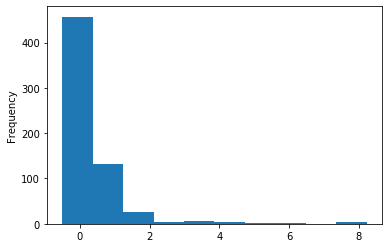

In [9]:
clean_df['Confirmed_lag'] = clean_df.groupby(['Province/State']).Confirmed.shift(1)

clean_df['growth number daily'] =  clean_df.Confirmed - clean_df.Confirmed_lag

clean_df['growth rate daily'] = clean_df.Confirmed / clean_df.Confirmed_lag - 1

clean_df[clean_df.Confirmed_lag > 0]['growth rate daily'].plot.hist()

In [10]:
clean_df['growth rate daily'].describe()

count    651.000000
mean            inf
std             NaN
min       -0.500000
25%        0.000000
50%        0.176471
75%        0.500000
max             inf
Name: growth rate daily, dtype: float64

In [11]:
# focus on cases where base is above 8
heavy_affect_df = clean_df[clean_df['Confirmed_lag'] >= 8]
heavy_affect_df.describe()

,month,day,Confirmed,Suspected,Recovered,Deaths,Confirmed_lag,growth number daily,growth rate daily
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,1.431217,17.142857,333.529101,0.902116,9.219577,6.989418,270.708995,62.820106,0.303532
std,0.495903,12.637182,1417.037218,6.092431,39.787858,44.407385,1139.348283,373.184226,0.543096
min,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,8.000000,-2.000000,-0.200000
25%,1.000000,3.000000,26.000000,0.000000,0.000000,0.000000,19.000000,3.000000,0.100210
50%,1.000000,25.000000,70.000000,0.000000,1.000000,0.000000,57.000000,12.000000,0.183409
75%,2.000000,29.000000,190.750000,0.000000,4.750000,1.000000,161.250000,29.000000,0.347076
max,2.000000,31.000000,16678.000000,72.000000,522.000000,479.000000,11177.000000,5501.000000,8.222222


In [12]:
heavy_affect_df['day count'] = heavy_affect_df.groupby('Province/State')['period'].rank()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
growth_df = heavy_affect_df.pivot_table(values = 'growth rate daily', index = 'day count', columns='Province/State').reset_index()
growth_df

Province/State,day count,Anhui,Beijing,Chongqing,Fujian,Gansu,Germany,Guangdong,Guangxi,Guizhou,...,Shanxi,Sichuan,Singapore,South Korea,Taiwan,Thailand,Tianjin,Xinjiang,Yunnan,Zhejiang
0,1.0,0.666667,0.400000,2.000000,0.800000,0.357143,-0.20,0.529412,0.434783,0.000000,...,0.444444,0.875000,0.000000,0.090909,0.000000,0.000000,0.625000,0.076923,0.727273,1.700000
1,2.0,3.000000,0.571429,1.777778,0.944444,0.263158,0.25,0.230769,0.393939,0.333333,...,0.538462,1.933333,0.600000,0.250000,0.125000,0.750000,0.076923,0.214286,0.368421,0.592593
2,3.0,0.166667,0.636364,0.466667,0.685714,0.083333,0.20,0.656250,0.108696,0.250000,...,0.350000,0.568182,0.125000,0.066667,0.111111,0.000000,0.642857,0.000000,0.692308,1.418605
3,4.0,0.514286,0.416667,0.200000,0.389831,0.115385,NaN,0.849057,0.137255,0.933333,...,0.296296,0.304348,0.000000,NaN,0.000000,0.000000,0.086957,0.058824,0.250000,0.230769
4,5.0,0.433962,0.333333,0.113636,0.231707,0.206897,NaN,0.489796,0.344828,0.000000,...,0.114286,0.200000,0.333333,NaN,0.100000,0.357143,0.080000,0.166667,0.381818,0.351562
5,6.0,0.315789,0.176471,0.122449,0.000000,0.142857,NaN,0.034247,0.115385,0.310345,...,0.205128,0.314815,NaN,NaN,NaN,0.000000,0.185185,0.142857,0.092105,0.710983
6,7.0,0.185000,0.137500,0.248485,0.188119,0.275000,NaN,0.596026,0.011494,0.210526,...,0.191489,0.246479,NaN,NaN,NaN,0.315789,0.000000,0.208333,0.120482,0.445946
7,8.0,0.000000,0.219780,0.155340,0.200000,0.078431,NaN,0.290456,0.136364,0.260870,...,0.178571,0.000000,NaN,NaN,NaN,NaN,0.500000,0.103448,0.129032,0.254673
8,9.0,0.253165,0.090090,0.100840,0.104167,0.036364,NaN,0.263666,0.270000,0.103448,...,0.121212,0.169492,NaN,NaN,NaN,NaN,0.000000,NaN,0.114286,0.001862
9,10.0,0.144781,0.148760,0.145038,0.125786,NaN,NaN,0.109415,0.000000,NaN,...,0.094595,0.115942,NaN,NaN,NaN,NaN,0.250000,NaN,0.042735,0.113383


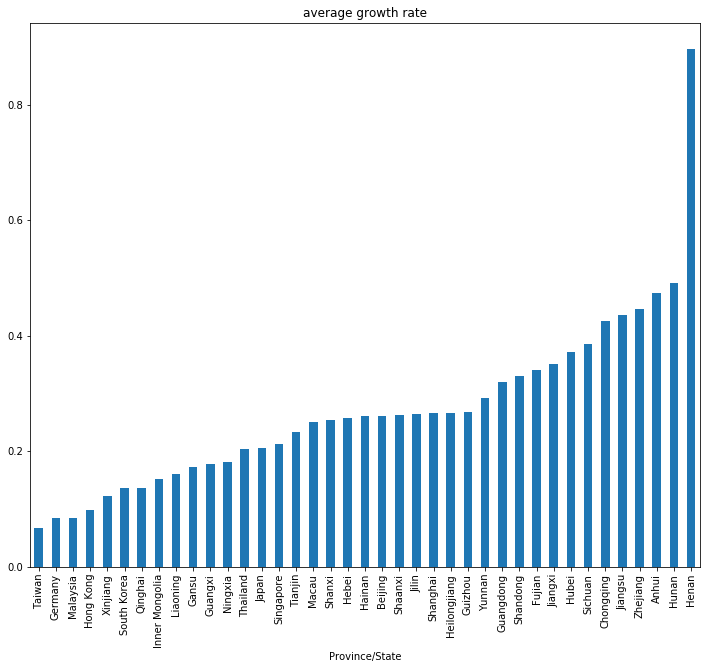

In [14]:
# arithmatic mean of growth rate
growth_df.set_index('day count').mean().sort_values().plot.bar(figsize=(12,10),
                                                              title='average growth rate')

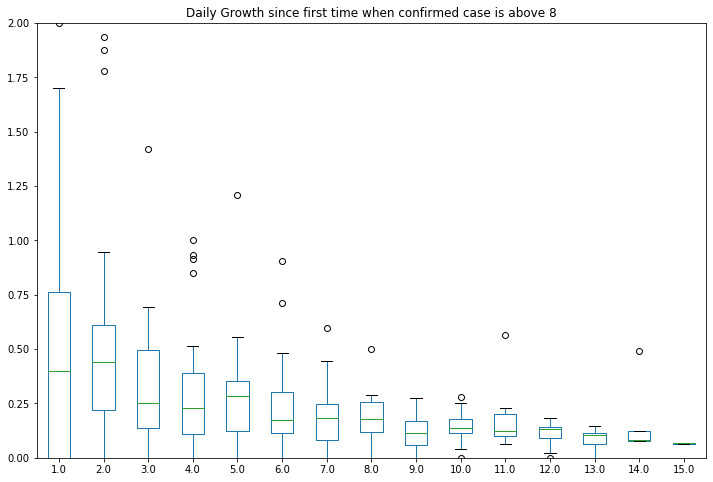

In [15]:
growth_df.set_index('day count').transpose().plot.box(figsize =(12, 8), 
                                         title ='Daily Growth since first time when confirmed case is above 8',
                                         ylim =(0, 2))

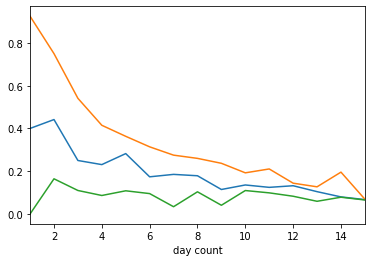

In [16]:
# deceleration? caveat: ommision bias

growth_df.set_index('day count').median(axis =1).plot()
growth_df.set_index('day count').quantile(q=0.8, axis =1).plot()
growth_df.set_index('day count').quantile(q=0.2, axis =1).plot()

In [17]:
# cumulative growth rate from base of the first time there is more than 8 "confirmed case"
earliest_df = heavy_affect_df. \
            groupby(['Province/State']). \
            agg({'Confirmed':'min'}).reset_index().rename(columns ={'Confirmed': 'base'})

earliest_df.sort_values(by='base',ascending=False).head()

,Province/State,base
14,Hubei,444
12,Henan,83
27,Shandong,39
19,Jiangxi,36
7,Guangxi,33


In [18]:
heavy_affect_df = pd.merge(heavy_affect_df, earliest_df, how = 'left', left_on = 'Province/State', right_on = 'Province/State')
heavy_affect_df

,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period,Confirmed_lag,growth number daily,growth rate daily,day count,base
0,Anhui,1,24,2020-01-24 12:00:00,15,4,0,0,2020-01-24,9.0,6.0,0.666667,1.0,15
1,Anhui,1,25,2020-01-25 12:00:00,60,4,0,0,2020-01-25,15.0,45.0,3.000000,2.0,15
2,Anhui,1,26,2020-01-26 23:00:00,70,4,0,0,2020-01-26,60.0,10.0,0.166667,3.0,15
3,Anhui,1,27,2020-01-27 20:30:00,106,0,0,0,2020-01-27,70.0,36.0,0.514286,4.0,15
4,Anhui,1,28,2020-01-28 23:00:00,152,0,0,0,2020-01-28,106.0,46.0,0.433962,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Zhejiang,2,1,2020-02-01 10:53:00,599,0,21,0,2020-02-01,538.0,61.0,0.113383,10.0,27
374,Zhejiang,2,2,2020-02-02 18:03:00,661,0,32,0,2020-02-02,599.0,62.0,0.103506,11.0,27
375,Zhejiang,2,3,2020-02-03 13:33:00,724,0,43,0,2020-02-03,661.0,63.0,0.095310,12.0,27
376,Zhejiang,2,4,2020-02-04 13:03:00,829,0,62,0,2020-02-04,724.0,105.0,0.145028,13.0,27


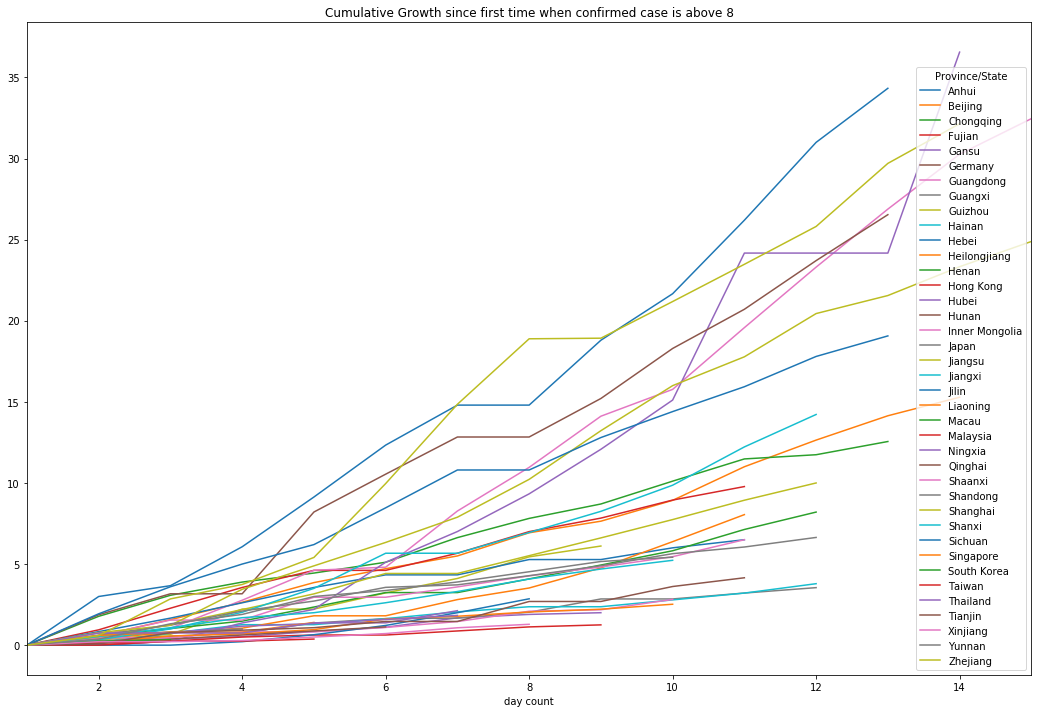

In [19]:
heavy_affect_df['cumulative growth'] = heavy_affect_df['Confirmed']/ heavy_affect_df['base'] - 1
cmlt_growth_df = heavy_affect_df.pivot_table(columns ='Province/State', index= 'day count', values='cumulative growth')
cmlt_growth_df.plot.line(figsize =(18, 12), 
                                         title ='Cumulative Growth since first time when confirmed case is above 8')

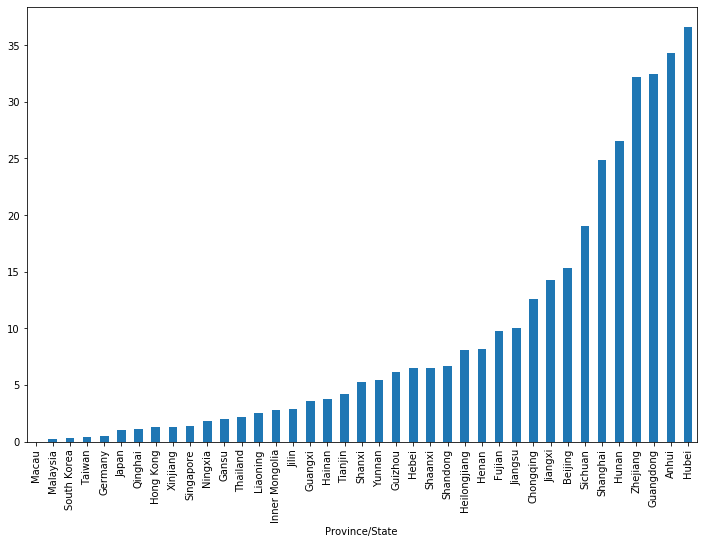

In [20]:
cmlt_growth_df.max().sort_values().plot.bar(figsize =(12,8))

In [21]:
cmlt_growth_df.max().sort_values().index

Index(['Macau', 'Malaysia', 'South Korea', 'Taiwan', 'Germany', 'Japan',
       'Qinghai', 'Hong Kong', 'Xinjiang', 'Singapore', 'Ningxia', 'Gansu',
       'Thailand', 'Liaoning', 'Inner Mongolia', 'Jilin', 'Guangxi', 'Hainan',
       'Tianjin', 'Shanxi', 'Yunnan', 'Guizhou', 'Hebei', 'Shaanxi',
       'Shandong', 'Heilongjiang', 'Henan', 'Fujian', 'Jiangsu', 'Chongqing',
       'Jiangxi', 'Beijing', 'Sichuan', 'Shanghai', 'Hunan', 'Zhejiang',
       'Guangdong', 'Anhui', 'Hubei'],
      dtype='object', name='Province/State')

In [22]:
# the following provinces/states have the highest cumulative growth
cmlt_growth_df[['Jiangxi', 'Chongqing',
       'Beijing', 'Sichuan', 'Shanghai', 'Hunan', 'Hubei', 'Guangdong',
       'Zhejiang', 'Anhui']]

Province/State,Jiangxi,Chongqing,Beijing,Sichuan,Shanghai,Hunan,Hubei,Guangdong,Zhejiang,Anhui
day count,,,,,,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.333333,1.777778,0.571429,1.933333,0.777778,1.875000,0.000000,0.230769,0.592593,3.000000
3.0,1.000000,3.074074,1.571429,3.600000,1.222222,3.166667,0.236486,1.038462,2.851852,3.666667
4.0,2.027778,3.888889,2.642857,5.000000,3.444444,3.166667,1.369369,2.769231,3.740741,6.066667
5.0,3.500000,4.444444,3.857143,6.200000,4.888889,8.208333,2.204955,4.615385,5.407407,9.133333
6.0,5.666667,5.111111,4.714286,8.466667,6.333333,10.541667,5.112613,4.807692,9.962963,12.333333
7.0,5.666667,6.629630,5.500000,10.800000,7.888889,12.833333,7.004505,8.269231,14.851852,14.800000
8.0,6.944444,7.814815,6.928571,10.800000,10.222222,12.833333,9.328829,10.961538,18.888889,14.800000
9.0,8.250000,8.703704,7.642857,12.800000,13.222222,15.208333,12.076577,14.115385,18.925926,18.800000


In [39]:
clean_df[clean_df['Province/State'] =='Hubei']

,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period,Confirmed_lag,growth number daily,growth rate daily,recover rate
260,Hubei,1,21,2020-01-21 00:00:00,270,11,0,0,2020-01-21,NaN,NaN,NaN,0.000000
261,Hubei,1,22,2020-01-22 12:00:00,444,0,0,0,2020-01-22,270.0,174.0,0.644444,0.000000
262,Hubei,1,23,2020-01-23 12:00:00,444,0,28,17,2020-01-23,444.0,0.0,0.000000,0.063063
263,Hubei,1,24,2020-01-24 12:00:00,549,0,31,24,2020-01-24,444.0,105.0,0.236486,0.056466
264,Hubei,1,25,2020-01-25 22:00:00,1052,0,42,52,2020-01-25,549.0,503.0,0.916211,0.039924
265,Hubei,1,26,2020-01-26 23:00:00,1423,0,44,76,2020-01-26,1052.0,371.0,0.352662,0.030921
266,Hubei,1,27,2020-01-27 20:30:00,2714,0,47,100,2020-01-27,1423.0,1291.0,0.907238,0.017318
267,Hubei,1,28,2020-01-28 23:00:00,3554,0,80,125,2020-01-28,2714.0,840.0,0.309506,0.022510
268,Hubei,1,29,2020-01-29 21:00:00,4586,0,90,162,2020-01-29,3554.0,1032.0,0.290377,0.019625
269,Hubei,1,30,2020-01-30 21:30:00,5806,0,116,204,2020-01-30,4586.0,1220.0,0.266027,0.019979


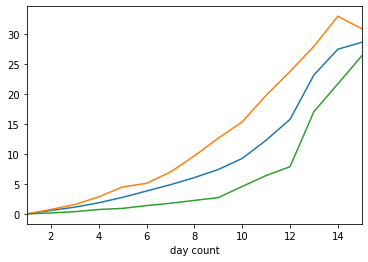

In [24]:
# deceleration? (caveat: ommited variable)
cmlt_growth_df.mean(axis=1).plot()
cmlt_growth_df.quantile(q=0.8,axis=1).plot()
cmlt_growth_df.quantile(q=0.2,axis=1).plot()

##### Recover rate using the latest data available

In [25]:
clean_df['recover rate'] = clean_df.Recovered / clean_df.Confirmed
latest_df = clean_df.groupby(['Province/State']).agg({'Last Update': 'max'}).reset_index()
latest_df

,Province/State,Last Update
0,Anhui,2020-02-05 01:13:00
1,Arizona,2020-02-01 10:00:00
2,Australia,2020-01-27 09:00:00
3,Bavaria,2020-02-01 10:00:00
4,Beijing,2020-02-04 08:33:00
...,...,...
77,Vietnam,2020-02-03 21:43:00
78,Washington,2020-02-01 10:00:00
79,Xinjiang,2020-02-05 02:03:00
80,Yunnan,2020-02-04 23:23:00


In [26]:
latest_df = pd.merge(clean_df, latest_df, how = 'right', left_on = ['Province/State', 'Last Update'], right_on = ['Province/State', 'Last Update'])
latest_df

,Province/State,month,day,Last Update,Confirmed,Suspected,Recovered,Deaths,period,Confirmed_lag,growth number daily,growth rate daily,recover rate
0,Anhui,2,5,2020-02-05 01:13:00,530,0,20,0,2020-02-05,480.0,50.0,0.104167,0.037736
1,Arizona,2,1,2020-02-01 10:00:00,1,0,0,0,2020-02-01,1.0,0.0,0.000000,0.000000
2,Australia,1,27,2020-01-27 09:00:00,5,0,0,0,2020-01-27,4.0,1.0,0.250000,0.000000
3,Bavaria,2,1,2020-02-01 10:00:00,7,0,0,0,2020-02-01,7.0,0.0,0.000000,0.000000
4,Beijing,2,4,2020-02-04 08:33:00,228,0,23,1,2020-02-04,212.0,16.0,0.075472,0.100877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Vietnam,2,3,2020-02-03 21:43:00,8,0,1,0,2020-02-03,6.0,2.0,0.333333,0.125000
78,Washington,2,1,2020-02-01 10:00:00,1,0,0,0,2020-02-01,1.0,0.0,0.000000,0.000000
79,Xinjiang,2,5,2020-02-05 02:03:00,32,0,0,0,2020-02-05,29.0,3.0,0.103448,0.000000
80,Yunnan,2,4,2020-02-04 23:23:00,122,0,5,0,2020-02-04,117.0,5.0,0.042735,0.040984


Percentage over total confirmed cases: 3.67%


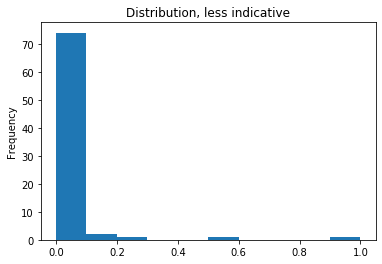

In [27]:
latest_df['recover rate'].plot.hist(title = 'Distribution, less indicative') # not much meaningful data is biased by many cases with very few confirmed case
print('Percentage over total confirmed cases: {0:.2%}'.format(latest_df.Recovered.sum() / latest_df.Confirmed.sum())) # ratio overall is more indicative

#### Time-series Analysis on Growth Rate

In [28]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf

In [29]:
# auto-correlation
[(x, acf(growth_df[x].dropna())) for x in growth_df.columns.to_list()]

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


[('day count',
  array([ 1.        ,  0.8       ,  0.60357143,  0.41428571,  0.23571429,
          0.07142857, -0.075     , -0.2       , -0.3       , -0.37142857,
         -0.41071429, -0.41428571, -0.37857143, -0.3       , -0.175     ])),
 ('Anhui',
  array([ 1.        ,  0.04715971,  0.08411233,  0.05610094,  0.00343404,
         -0.04187831, -0.14145404, -0.06686969, -0.10772307, -0.09292294,
         -0.09451786, -0.13568659, -0.00975452])),
 ('Beijing',
  array([ 1.        ,  0.75849052,  0.44144759,  0.16073937, -0.03129198,
         -0.09916729, -0.18369585, -0.19274227, -0.21740906, -0.27050608,
         -0.30802058, -0.31350811, -0.18404612, -0.06029014])),
 ('Chongqing',
  array([ 1.        ,  0.56946168,  0.07804612, -0.03859953, -0.07275278,
         -0.05852173, -0.05995625, -0.10952534, -0.1338653 , -0.1504837 ,
         -0.19889556, -0.2158079 , -0.10909971])),
 ('Fujian',
  array([ 1.        ,  0.72119471,  0.31441439, -0.00294539, -0.17063549,
         -0.19075564, -0.

In [30]:
# unable to run VAR due to missing values (synthetic control?)
model = AutoReg(growth_df['Sichuan'].dropna(), lags=1)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                Sichuan   No. Observations:                   13
Model:                     AutoReg(1)   Log Likelihood                  -7.043
Method:               Conditional MLE   S.D. of innovations              0.435
Date:                Wed, 05 Feb 2020   AIC                             -1.164
Time:                        11:56:09   BIC                             -1.043
Sample:                             1   HQIC                            -1.209
                                   13                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1464      0.161      0.909      0.364      -0.169       0.462
Sichuan.L1     0.4807      0.245      1.961      0.050       0.000       0.961
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0803           +0.0000j            2.0803            0.0000
-----------------------------------------------------------------------------
"""

### ***Retired-*** 
#### Alternative method choose worksheet before merging (read from Excel manually downloaded)

In [31]:
file_path = 'Novel Coronavirus (2019-nCoV) Cases, provided by JHU CSSE.xlsx'
# raw_df = pd.concat(pd.read_excel(file_path, sheet_name= None), ignore_index = True, sort=True)

xl = pd.ExcelFile(file_path)
xl.sheet_names

['Feb02_9PM',
 'Feb02_745pm',
 'Feb02_5am',
 'Feb01_11pm',
 'Feb01_6pm',
 'Feb01_10am',
 'Jan31_7pm',
 'Jan31_2pm',
 'Jan30_930pm',
 'Jan30_11am',
 'Jan29_9pm',
 'Jan29_230pm',
 'Jan29_130pm',
 'Jan28_11pm',
 'Jan28_6pm',
 'Jan28_1pm',
 'Jan27_830pm',
 'Jan27_7pm',
 'Jan27_9am',
 'Jan26_11pm',
 'Jan26_11am',
 'Jan25_10pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12pm',
 'Jan24_12am',
 'Jan23_12pm',
 'Jan22_12pm',
 'Jan22_12am']

In [32]:
# use the latest time for each date
split_name_df = pd.DataFrame(data = list(map(lambda x: x.split('_'), xl.sheet_names)), columns =['date','hour'])
split_name_df

,date,hour
0,Feb02,9PM
1,Feb02,745pm
2,Feb02,5am
3,Feb01,11pm
4,Feb01,6pm
5,Feb01,10am
6,Jan31,7pm
7,Jan31,2pm
8,Jan30,930pm
9,Jan30,11am


In [33]:
# extract time components
split_name_df['suffix'] = split_name_df.hour.apply(lambda x: x[-2:])

split_name_df['hour_digit'] = split_name_df.hour.str.extract(r'(?P<hour>[\d]+)')

split_name_df['date_digit'] = split_name_df.date.str.extract('([\d]+)').astype(int)

In [34]:
# deal with special case of 12am and half-hour

split_name_df.loc[split_name_df.hour == '12am', 'date_digit'] = split_name_df.loc[split_name_df.hour == '12am', 'date_digit'] - 1

split_name_df['hour_digit'] = split_name_df.hour_digit.str.replace('30','').astype(int)

split_name_df.loc[split_name_df.hour == '12am', 'hour_digit'] = 24

split_name_df.loc[split_name_df.hour == '12am', 'suffix'] = 'pm'

In [35]:
# filter for the last file for each day

filter_name_df = split_name_df[split_name_df.suffix == 'pm']

filter_name_df = filter_name_df.groupby('date_digit').agg({'hour_digit':'max','suffix': 'max'}).reset_index()

filter_name_df

,date_digit,hour_digit,suffix
0,1,11,pm
1,2,745,pm
2,21,24,pm
3,22,12,pm
4,23,24,pm
5,24,24,pm
6,25,12,pm
7,26,11,pm
8,27,8,pm
9,28,11,pm


In [36]:
filter_name_df = pd.merge(split_name_df,filter_name_df, how = 'right', 
         left_on = ['date_digit', 'hour_digit','suffix'], right_on = ['date_digit','hour_digit','suffix'])

filter_name = (filter_name_df.date + '_' + filter_name_df.hour).to_list()
filter_name

['Feb02_745pm',
 'Feb01_11pm',
 'Jan31_7pm',
 'Jan30_930pm',
 'Jan29_9pm',
 'Jan28_11pm',
 'Jan27_830pm',
 'Jan26_11pm',
 'Jan25_12pm',
 'Jan25_12am',
 'Jan24_12am',
 'Jan22_12pm',
 'Jan22_12am']

In [37]:
main_2_df = pd.concat(pd.read_excel(file_path, sheet_name= filter_name), ignore_index = True)
main_2_df['Last Update'].value_counts()

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


2020-01-31 19:00:00    63
2020-01-30 21:30:00    59
2020-01-29 21:00:00    56
2020-01-27 20:30:00    52
2020-01-28 23:00:00    51
2020-01-26 23:00:00    47
2020-01-25 12:00:00    44
2020-01-25 00:00:00    44
2020-01-22 12:00:00    38
2020-01-24 00:00:00    38
2020-01-28 18:00:00     1
Name: Last Update, dtype: int64

In [38]:
# def read_excel_sheets(xls_path):
#     """Read all sheets of an Excel workbook and return a single DataFrame"""
#     print(f'Loading {xls_path} into pandas')
#     xl = pd.ExcelFile(xls_path)
#     df = pd.DataFrame()
#     columns = None
#     for idx, name in enumerate(xl.sheet_names):
#         print(f'Reading sheet #{idx}: {name}')
#         sheet = xl.parse(name)
#         if idx == 0:
#             # Save column names from the first sheet to match for append
#             columns = sheet.columns
#         sheet.columns = columns
#         # Assume index of existing data frame when appended
#         df = df.append(sheet, ignore_index=True)
#     return df

# read_excel_sheets(file_name)